In [1]:
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from cycler import cycler
import numpy as np
from scipy.constants import golden_ratio

import os, sys

In [3]:
color_cycle_wong = ['#000000','#E69F00','#CC79A7','#56B4E9','#009E73','#0072B2','#F0E442','#D55E00']
Six_color_cycle = ["#5790FC", "#F89C20", "#E42536", "#964A8B", "#9C9CA1", "#7A21DD"]
#Light Blue, Orange, Red, Grey, Pink, Dark Blue 

Eight_color_cycle = ["#1845FB", "#FF5E02", "#C91F16", "#C849A9", "#ADAD7D", "#86C8DD", "#578DFF", "#656364"]
#Dark Blue, Orange, Red, Pink, Olive Green, Cyan, Light Blue, Grey

Ten_color_cycle = ["#3F90DA", "#FFA90E", "#BD1F01", "#94A4A2", "#832DB6", "#A96B59", "#E76300", "#B9AC70", "#717581", "#92DADD"]
#Light Blue, Light Orange, Red, Light Grey, Purple, Brown, Dark Red/Orange, Tan, Dark Grey, Light Blue

Twelve_color_cycle = ["#3F90DA",  # Bright Blue (Blue)                                  - 12.5yr Model A
                      "#BD1F01",  # Strong Red (Red)                                    - 12.5yr Model B
                      "#FFA90E",  # Vivid Orange (Orange)                               - 12.5yr Model C
                      "#94A4A2",  # Dark Grayish Cyan (Light Gray)                      - 9yr Model B
                      "#832DB6",  # Strong Violet (Purple)                              - 9yr Model C
                      "#A96B59",  # Dark Moderate Red (Brown)                           - 5yr Model B
                      "#E76300",  # Pure (or mostly pure) orange (Red-Orange)           - 5yr Model C
                      "#92DADD",  # Very soft cyan (Cyan)                               - PAL2
                      "#B9AC70",  # Slightly desaturated yellow (Olive Green)           - Fonseca et. al (2023)
                      "#717581",  # Dark grayish blue (Bluish Grey)                     - Cromartie et. al (2020)
                      "#C849A9",  # Moderate magenta (Magenta)                          - 12.5yr Model B Restricted
                      "#ADAD7D"   # Mostly desaturated dark yellow (Light Olive Green)  - 12.5yr Model C Restricted
                      ]

mpl.rcParams['axes.prop_cycle'] = cycler(color=Twelve_color_cycle)
#mpl.style.use('default')
def get_fig_size(width=15,scale=1.):
    #width = 3.36 # 242 pt
    base_size = np.array([1, 1/scale/golden_ratio])
    fig_size = width * base_size
    return(fig_size)
mpl.rcParams['figure.figsize'] = get_fig_size()
mpl.rcParams['text.usetex'] = False
mpl.rc('font',**{'family':'serif','serif':['Times New Roman']})
#mpl.rcParams['figure.dpi'] = 300
mpl.rcParams['lines.linewidth'] = 4
mpl.rcParams['lines.markersize'] = 10
mpl.rcParams['axes.labelsize'] = 25
mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['ytick.labelsize'] = 20
mpl.rcParams['legend.fontsize'] = 18
linestyle_cycle=['-', '--', ':', '-.']

In [4]:
current_path = os.getcwd()
splt_path = current_path.split("/")
#op_path_idx = splt_path.index("akaiser")
#top_path_idx = splt_path.index("ark0015")
top_path_idx = splt_path.index("nanograv")
top_dir = "/".join(splt_path[0 : top_path_idx + 1])

la_path = top_dir+'/la_forge'
e_e_path = top_dir + '/enterprise_extensions'
ent_path = top_dir + '/enterprise'

sys.path.insert(0, la_path)
sys.path.insert(0, ent_path)
sys.path.insert(0, e_e_path)
sys.path.insert(0, top_dir+'/enterprise_timing')


from enterprise.pulsar import Pulsar
import enterprise.signals.utils as utils


import la_forge.core as co
from la_forge.core import TimingCore
from la_forge.core import Core

import nltm_plot_utils_v5 as nltm
import ltm_setup_pta_v2 as lspv2

In [6]:
psr_name = 'J1600-3053'
psr_dir = top_dir + '/enterprise_timing/{}/chains/'.format(psr_name)
save_dir = top_dir + f"/enterprise_timing/Figures/{psr_name}"

#parfile = top_dir + f"/12p5yr/{psr_name}/{psr_name}_NANOGrav_12yv4_ark_nltm.gls.par"
parfile = top_dir + f"/12p5yr/narrowband/par/{psr_name}_NANOGrav_12yv4.gls.par"
timfile = top_dir + f"/12p5yr/narrowband/tim/{psr_name}_NANOGrav_12yv4.tim"

psr_12p5yr = Pulsar(parfile, timfile, ephem='DE436', clk=None, drop_t2pulsar=False)

[tempo2Util.C:396] Warning: [MISC1] Unknown parameter in par file:  DMX
[tempo2Util.C:401] Warning: [DUP1] duplicated warnings have been suppressed.
[tempo2Util.C:396] Warning: [PAR2] Have not set a DM epoch. The period epoch will be used instead. ../par/J1600-3053_NANOGrav_12yv4.gls.par
[tempo2Util.C:396] Warning: [TIM1] Please place MODE flags in the parameter file 


# 12.5yr

In [7]:
orig_dmx_core_plaw = f'{top_dir}/noise_model_selection/chains/{psr_name}/{psr_name}_plaw_dmx.core'
chaindir_12p5yr_ltm_noRN = psr_dir+f'12p5yr/{psr_name}_DE436_tm_noRN_varyWN_ltm_v1'
chaindir_12p5yr_ltm_varyRN = psr_dir+f'12p5yr/{psr_name}_DE436_tm_varyRN_varyWN_ltm_v1'

In [8]:
chaindir_12p5yr_uniform_DE436_nltm_ltm_noRN_varyWN_full_nltm_tempo2_1 = psr_dir+f'12p5yr/{psr_name}_uniform_DE436_nltm_ltm_noRN_varyWN_full_nltm_tempo2_1'
chaindir_12p5yr_uniform_DE436_nltm_ltm_noRN_varyWN_ltm_nltm_tempo2_1 = psr_dir+f'12p5yr/{psr_name}_uniform_DE436_nltm_ltm_noRN_varyWN_ltm_nltm_tempo2_1'

In [9]:
chaindir_12p5yr_uniform_DE436_nltm_ltm_varyRN_varyWN_full_nltm_tempo2_1 = psr_dir+f'12p5yr/{psr_name}_uniform_DE436_nltm_ltm_varyRN_varyWN_full_nltm_tempo2_1'
chaindir_12p5yr_uniform_DE436_nltm_ltm_varyRN_varyWN_ltm_nltm_tempo2_1 = psr_dir+f'12p5yr/{psr_name}_uniform_DE436_nltm_ltm_varyRN_varyWN_ltm_nltm_tempo2_1'

# Make a List of `la_forge` Cores

In [10]:
burn=0.25

core_12p5yr_uniform_DE436_nltm_ltm_noRN_varyWN_full_nltm_tempo2_1 = TimingCore(label='_'.join(chaindir_12p5yr_uniform_DE436_nltm_ltm_noRN_varyWN_full_nltm_tempo2_1.split('/')[-2:]),
                              chaindir=chaindir_12p5yr_uniform_DE436_nltm_ltm_noRN_varyWN_full_nltm_tempo2_1,
                              tm_pars_path=chaindir_12p5yr_uniform_DE436_nltm_ltm_noRN_varyWN_full_nltm_tempo2_1+'/orig_timing_pars.pkl',
                              burn=burn)

core_12p5yr_uniform_DE436_nltm_ltm_noRN_varyWN_ltm_nltm_tempo2_1 = TimingCore(label='_'.join(chaindir_12p5yr_uniform_DE436_nltm_ltm_noRN_varyWN_ltm_nltm_tempo2_1.split('/')[-2:]),
                              chaindir=chaindir_12p5yr_uniform_DE436_nltm_ltm_noRN_varyWN_ltm_nltm_tempo2_1,
                              tm_pars_path=chaindir_12p5yr_uniform_DE436_nltm_ltm_noRN_varyWN_ltm_nltm_tempo2_1+'/orig_timing_pars.pkl',
                              burn=burn)

In [11]:
burn=0.25

core_12p5yr_uniform_DE436_nltm_ltm_varyRN_varyWN_full_nltm_tempo2_1 = TimingCore(label='_'.join(chaindir_12p5yr_uniform_DE436_nltm_ltm_varyRN_varyWN_full_nltm_tempo2_1.split('/')[-2:]),
                              chaindir=chaindir_12p5yr_uniform_DE436_nltm_ltm_varyRN_varyWN_full_nltm_tempo2_1,
                              tm_pars_path=chaindir_12p5yr_uniform_DE436_nltm_ltm_varyRN_varyWN_full_nltm_tempo2_1+'/orig_timing_pars.pkl',
                              burn=burn)

core_12p5yr_uniform_DE436_nltm_ltm_varyRN_varyWN_ltm_nltm_tempo2_1 = TimingCore(label='_'.join(chaindir_12p5yr_uniform_DE436_nltm_ltm_varyRN_varyWN_ltm_nltm_tempo2_1.split('/')[-2:]),
                              chaindir=chaindir_12p5yr_uniform_DE436_nltm_ltm_varyRN_varyWN_ltm_nltm_tempo2_1,
                              tm_pars_path=chaindir_12p5yr_uniform_DE436_nltm_ltm_varyRN_varyWN_ltm_nltm_tempo2_1+'/orig_timing_pars.pkl',
                              burn=burn)

In [12]:

#cH_dmx_pl = co.load_Core(orig_dmx_core_plaw)
burn=0.25

core_12p5yr_ltm_noRN = Core(label='_'.join(chaindir_12p5yr_ltm_noRN.split('/')[-2:]),
                              chaindir=chaindir_12p5yr_ltm_noRN,
                              burn=burn)
core_12p5yr_ltm_varyRN = Core(label='_'.join(chaindir_12p5yr_ltm_varyRN.split('/')[-2:]),
                              chaindir=chaindir_12p5yr_ltm_varyRN,
                              burn=burn)

In [13]:
nltm.check_convergence([core_12p5yr_ltm_noRN])

-------------------------------
core: 12p5yr_J1600-3053_DE436_tm_noRN_varyWN_ltm_v1
	 lnpost: 178622.365217, lnlike: 178641.593659
	 Params exceed rhat threshold:  ['J1600-3053_Rcvr1_2_GASP_efac', 'J1600-3053_Rcvr_800_GASP_efac']
	 Can't run Geweke test
	 Max autocorrelation length: 57.7161042605359, Effective sample size: 171.52924867053522



In [14]:
core_list_everything = [core_12p5yr_ltm_noRN,
                        core_12p5yr_ltm_varyRN,
                        core_12p5yr_uniform_DE436_nltm_ltm_noRN_varyWN_full_nltm_tempo2_1,
                        core_12p5yr_uniform_DE436_nltm_ltm_noRN_varyWN_ltm_nltm_tempo2_1,
                        core_12p5yr_uniform_DE436_nltm_ltm_varyRN_varyWN_full_nltm_tempo2_1,
                        core_12p5yr_uniform_DE436_nltm_ltm_varyRN_varyWN_ltm_nltm_tempo2_1
                        ]
core_list_legend_everything = ["Model A: No RN", "Model A: Varied RN", "Model B: No RN", "Model C: No RN", "Model B: Varied RN", "Model C: Varied RN"]

In [15]:
plot_truths = {}
plot_truths_scaled = {}

for key,val in core_list_everything[4].tm_pars_orig.items():
    if key in ['XDOT','PBDOT']:
        if np.log10(val[1]) > -10.0:
            print(f"USING PHYSICAL {key}. Val: ", val[0], "Err: ", val[1] * 1e-12)
            plot_truths[key] = [val[0],val[1]*1e-12,'physical']
            plot_truths_scaled[key] = [val[0],val[1]*1e-12,'physical']
        else:
            plot_truths[key] = val
            if val[-1] == 'normalized':
                plot_truths_scaled[key] = [0.,1.,'normalized']
            else:
                plot_truths_scaled[key] = val
    else:
        plot_truths[key] = val
        if val[-1] == 'normalized':
            plot_truths_scaled[key] = [0.,1.,'normalized']
        else:
            plot_truths_scaled[key] = val
#plot_truths

USING PHYSICAL XDOT. Val:  -4.084999999999999918e-15 Err:  5.7499999999999997874e-16


# Everything

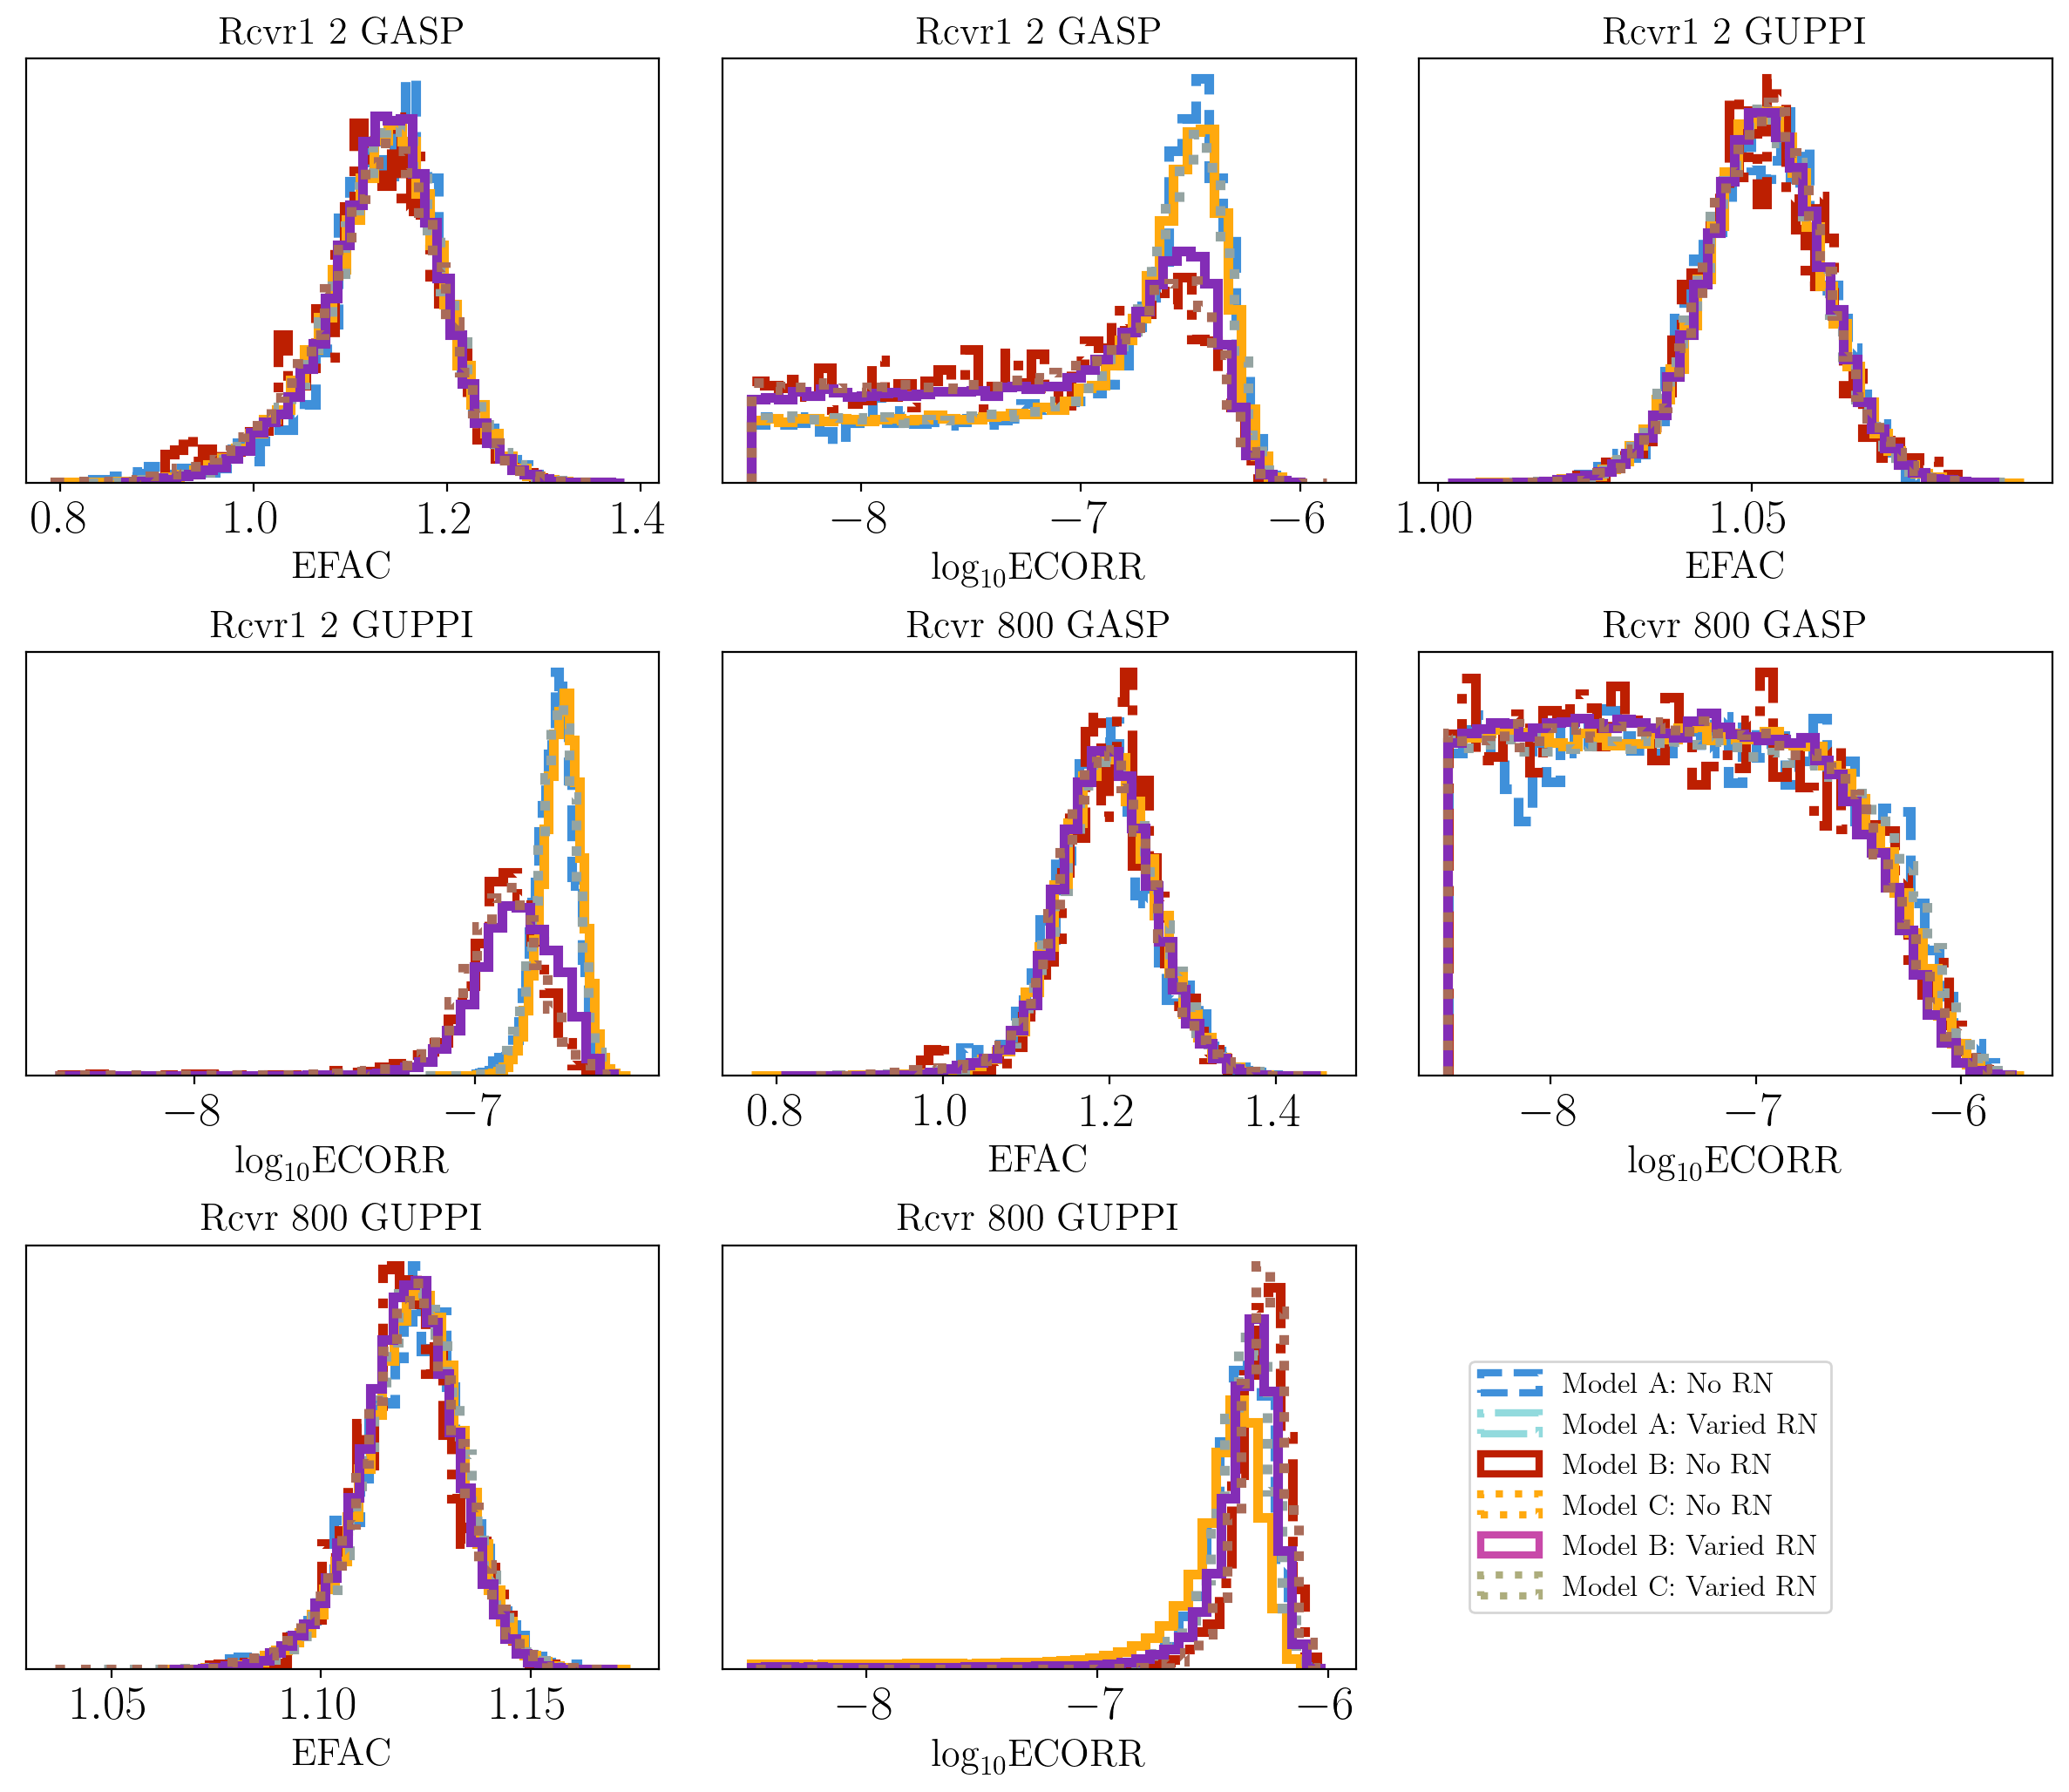

In [16]:
mpl.rcParams['text.usetex'] = True
nltm.fancy_plot_all_param_overlap(psr_name,
                                  core_list_everything,
                                  core_list_legend=core_list_legend_everything,
                                  par_sigma=plot_truths,
                                  ncols=3,
                                fig_kwargs={
                                            #"legendloc":(0.7,0.75),
                                            "legendloc":(0.71,0.1),
                                            #"suptitle":f"NG 12.5yr:\n {psr_name} Common Noise Parameters",
                                            #"suptitleloc":(0.4,1.2),
                                            #"suptitleloc":(0.34,1.1),
                                            "legendfontsize":12,
                                            "hspace":0.4,
                                            "colors": ["C0", "C7", "C1", "C2", "C10", "C11"]},
                                  linestyles=[linestyle_cycle[1], linestyle_cycle[3],
                                              linestyle_cycle[0], linestyle_cycle[2],linestyle_cycle[0], linestyle_cycle[2]],
                                  exclude=True,preliminary=False,close=False,show_suptitle=False)
#plt.savefig(f'{save_dir}/{psr_name}_common_noise_param_plots.png', dpi=300, bbox_inches='tight')
#plt.savefig(f'{save_dir}/{psr_name}_common_noise_param_plots.pdf', dpi=300, bbox_inches='tight')
plt.show()
mpl.rcParams['text.usetex'] = False

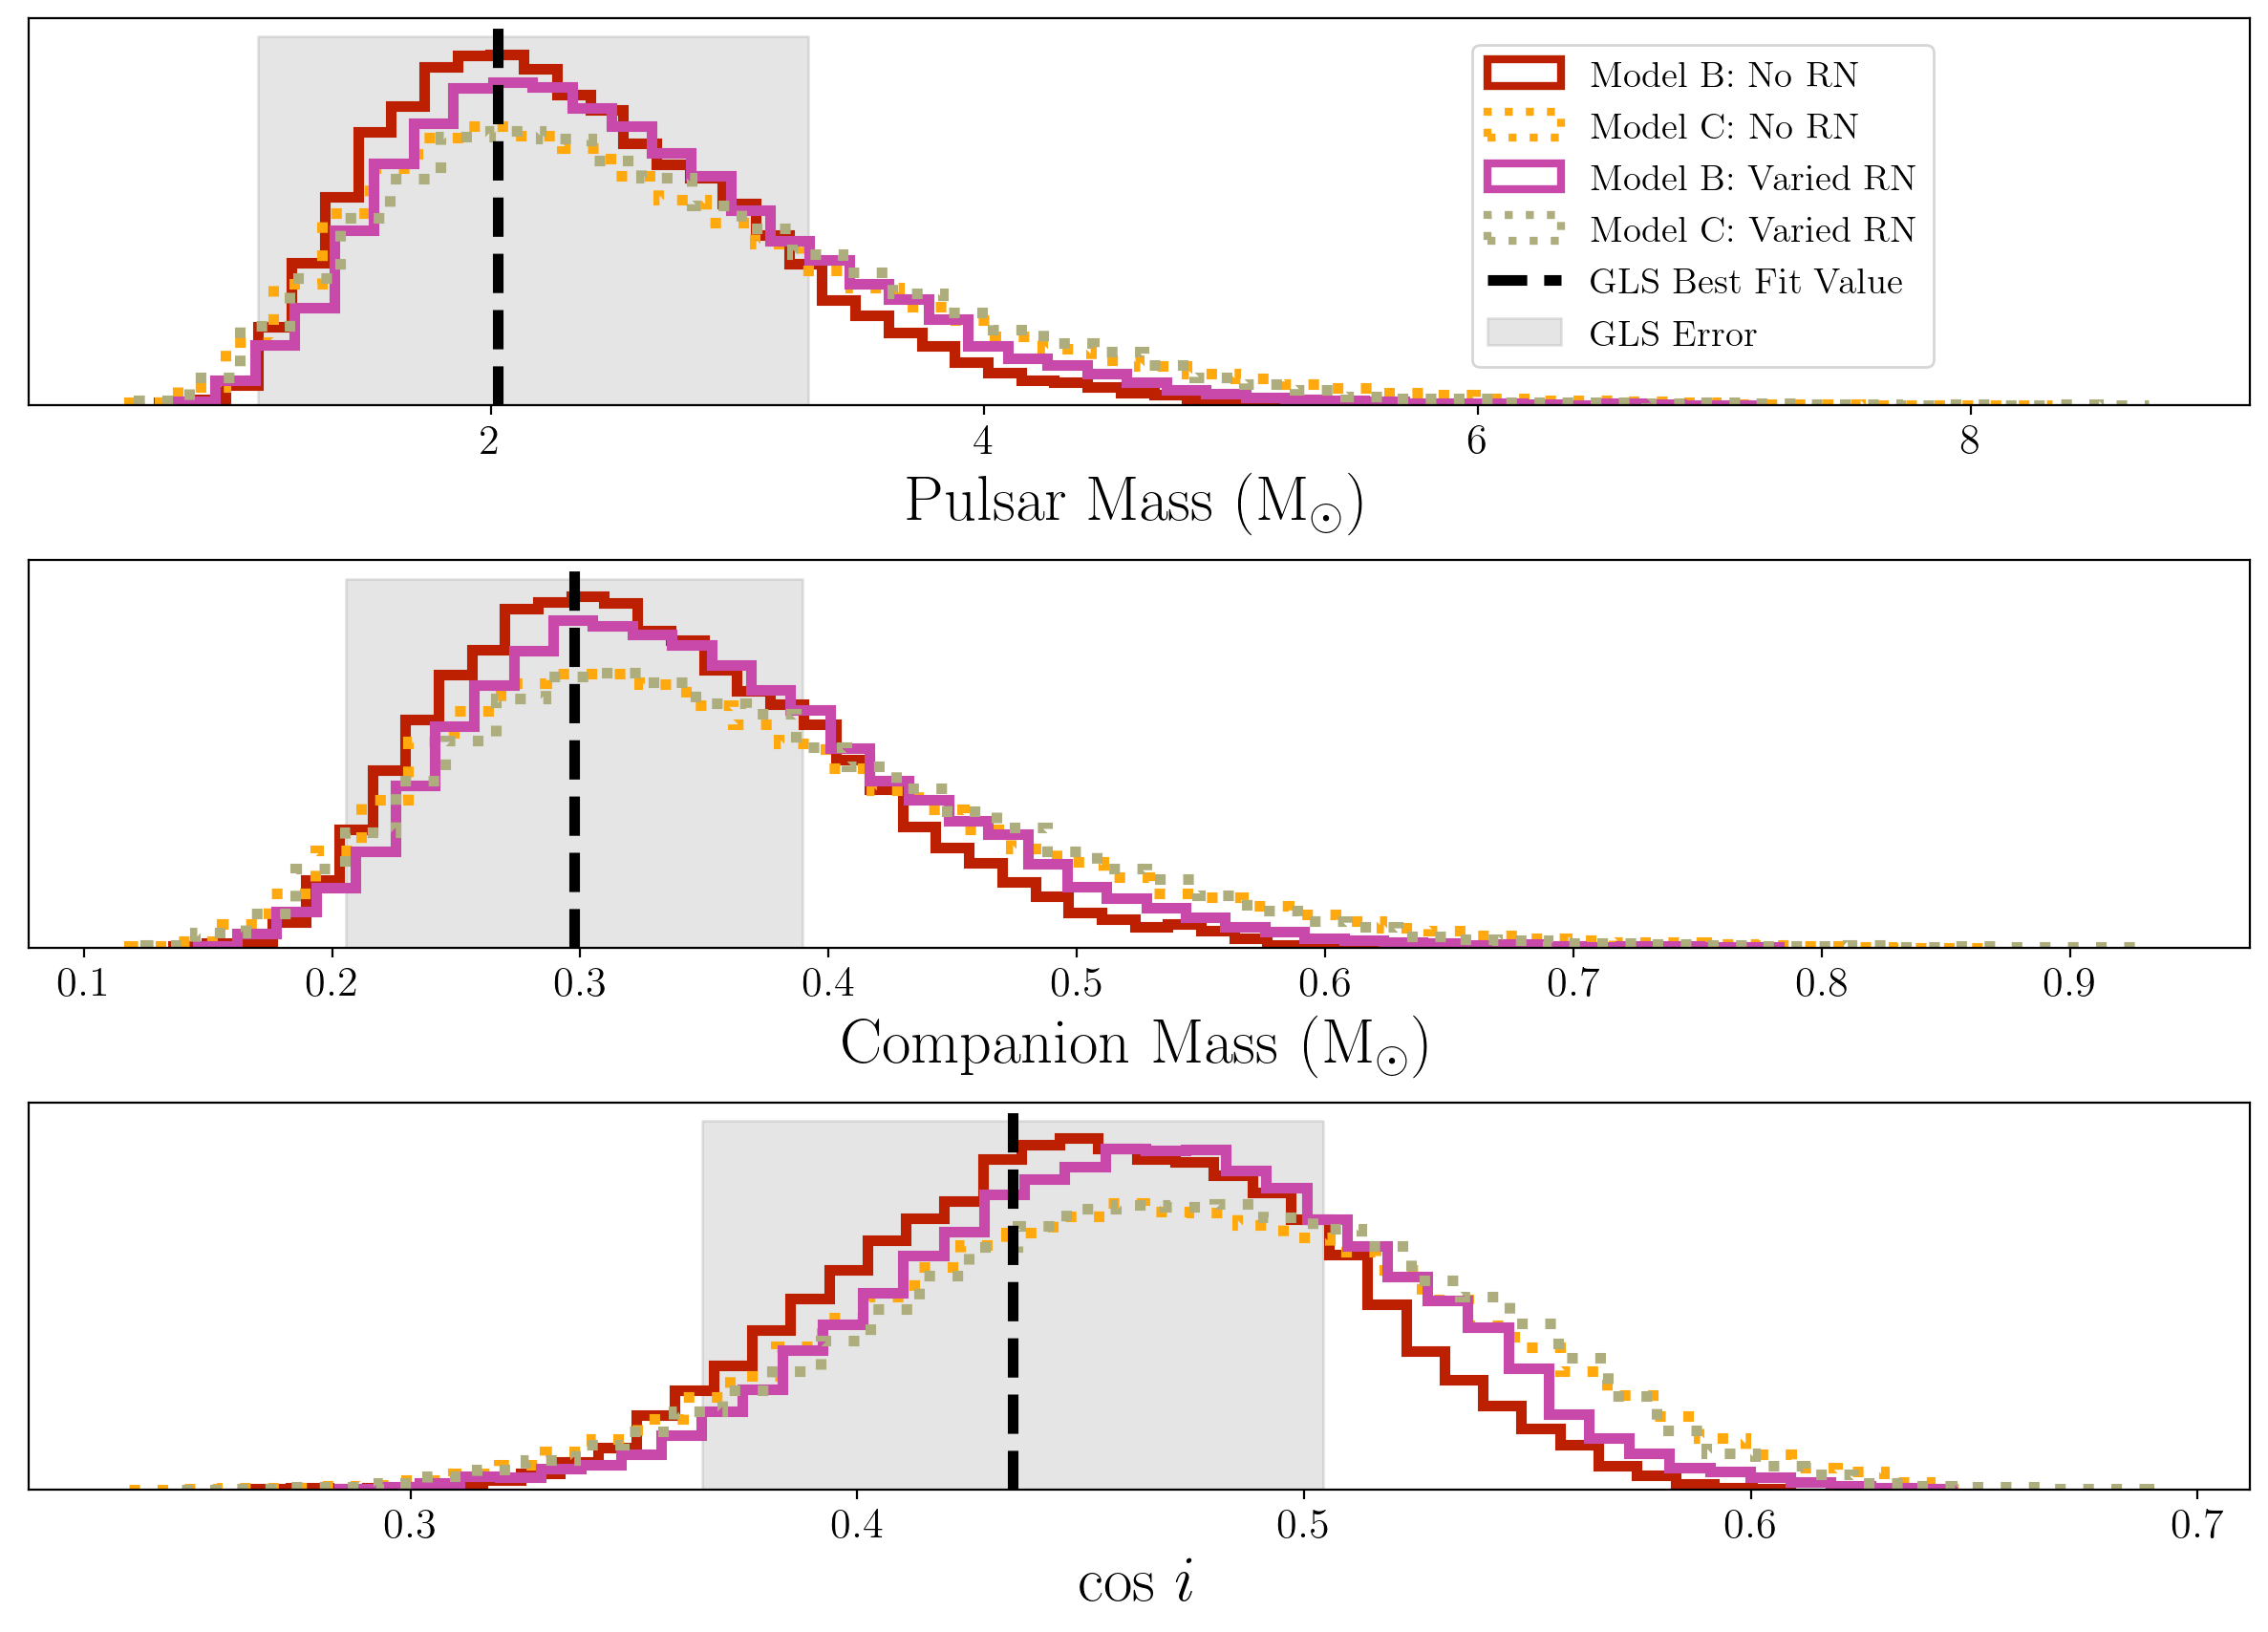

In [18]:
mpl.rcParams['text.usetex'] = True
nltm.mass_plot(psr_name,core_list_everything[2:],
               core_list_legend=core_list_legend_everything[2:],
               par_sigma=plot_truths,
               linestyles=[linestyle_cycle[0], linestyle_cycle[2],linestyle_cycle[0], linestyle_cycle[2]],
               close=True,
               show_suptitle=False,
               fig_kwargs={
                           "legendloc":(0.65, 0.1),
                           "legendfontsize": 14,
                           "colors":["C1", "C2", "C10", "C11"]
                           },
               # conf_int=68.3,print_conf_int=True
               )
#plt.savefig(f'{save_dir}/{psr_name}_combined_mass_plots.png', dpi=300, bbox_inches='tight')
#plt.savefig(f'{save_dir}/{psr_name}_combined_mass_plots.pdf', dpi=300, bbox_inches='tight')
plt.show()
mpl.rcParams['text.usetex'] = False

# Linear Coefficients

In [26]:
pta = lspv2.pta_setup(psr_12p5yr, red_noise=False)
pta.param_names

['J1600-3053_Rcvr1_2_GASP_efac',
 'J1600-3053_Rcvr1_2_GASP_log10_ecorr',
 'J1600-3053_Rcvr1_2_GASP_log10_t2equad',
 'J1600-3053_Rcvr1_2_GUPPI_efac',
 'J1600-3053_Rcvr1_2_GUPPI_log10_ecorr',
 'J1600-3053_Rcvr1_2_GUPPI_log10_t2equad',
 'J1600-3053_Rcvr_800_GASP_efac',
 'J1600-3053_Rcvr_800_GASP_log10_ecorr',
 'J1600-3053_Rcvr_800_GASP_log10_t2equad',
 'J1600-3053_Rcvr_800_GUPPI_efac',
 'J1600-3053_Rcvr_800_GUPPI_log10_ecorr',
 'J1600-3053_Rcvr_800_GUPPI_log10_t2equad']

In [27]:
idxs = np.argsort(core_12p5yr_ltm_noRN.get_param('lnlike',to_burn=False))[::-1][:500]

In [28]:
core_12p5yr_ltm_noRN.params

['J1600-3053_Rcvr1_2_GASP_efac',
 'J1600-3053_Rcvr1_2_GASP_log10_ecorr',
 'J1600-3053_Rcvr1_2_GASP_log10_t2equad',
 'J1600-3053_Rcvr1_2_GUPPI_efac',
 'J1600-3053_Rcvr1_2_GUPPI_log10_ecorr',
 'J1600-3053_Rcvr1_2_GUPPI_log10_t2equad',
 'J1600-3053_Rcvr_800_GASP_efac',
 'J1600-3053_Rcvr_800_GASP_log10_ecorr',
 'J1600-3053_Rcvr_800_GASP_log10_t2equad',
 'J1600-3053_Rcvr_800_GUPPI_efac',
 'J1600-3053_Rcvr_800_GUPPI_log10_ecorr',
 'J1600-3053_Rcvr_800_GUPPI_log10_t2equad',
 'lnpost',
 'lnlike',
 'chain_accept',
 'pt_chain_accept']

In [29]:
coeffs = []
for idx in idxs:
    x0_dict = {}
    for p in pta.params:
        if "coefficients" in p.name:
            #x0_dict.update({p.name:np.random.randn(p.size)})
            print('not adding',p.name)
        else:
            x0_dict.update({p.name:core_12p5yr_ltm_noRN.get_param(p.name,to_burn=False)[idx]})
    coeffs.append(utils.get_coefficients(pta, x0_dict, variance=True))

In [33]:
psr_12p5yr.fitpars

['Offset',
 'ELONG',
 'ELAT',
 'F0',
 'F1',
 'PMELONG',
 'PMELAT',
 'PX',
 'SINI',
 'PB',
 'T0',
 'A1',
 'OM',
 'ECC',
 'XDOT',
 'M2',
 'FD1',
 'FD2',
 'DMX_0001',
 'DMX_0002',
 'DMX_0003',
 'DMX_0004',
 'DMX_0005',
 'DMX_0006',
 'DMX_0007',
 'DMX_0008',
 'DMX_0009',
 'DMX_0010',
 'DMX_0011',
 'DMX_0012',
 'DMX_0013',
 'DMX_0014',
 'DMX_0015',
 'DMX_0016',
 'DMX_0017',
 'DMX_0018',
 'DMX_0019',
 'DMX_0020',
 'DMX_0021',
 'DMX_0022',
 'DMX_0023',
 'DMX_0024',
 'DMX_0025',
 'DMX_0026',
 'DMX_0027',
 'DMX_0028',
 'DMX_0029',
 'DMX_0030',
 'DMX_0031',
 'DMX_0032',
 'DMX_0033',
 'DMX_0034',
 'DMX_0035',
 'DMX_0036',
 'DMX_0037',
 'DMX_0038',
 'DMX_0039',
 'DMX_0040',
 'DMX_0041',
 'DMX_0042',
 'DMX_0043',
 'DMX_0044',
 'DMX_0045',
 'DMX_0046',
 'DMX_0047',
 'DMX_0048',
 'DMX_0049',
 'DMX_0050',
 'DMX_0051',
 'DMX_0052',
 'DMX_0053',
 'DMX_0054',
 'DMX_0055',
 'DMX_0056',
 'DMX_0057',
 'DMX_0058',
 'DMX_0059',
 'DMX_0060',
 'DMX_0061',
 'DMX_0062',
 'DMX_0063',
 'DMX_0064',
 'DMX_0065',
 'DM

In [34]:
core_list_everything[4].params

['J1600-3053_Rcvr1_2_GASP_efac',
 'J1600-3053_Rcvr1_2_GASP_log10_ecorr',
 'J1600-3053_Rcvr1_2_GASP_log10_t2equad',
 'J1600-3053_Rcvr1_2_GUPPI_efac',
 'J1600-3053_Rcvr1_2_GUPPI_log10_ecorr',
 'J1600-3053_Rcvr1_2_GUPPI_log10_t2equad',
 'J1600-3053_Rcvr_800_GASP_efac',
 'J1600-3053_Rcvr_800_GASP_log10_ecorr',
 'J1600-3053_Rcvr_800_GASP_log10_t2equad',
 'J1600-3053_Rcvr_800_GUPPI_efac',
 'J1600-3053_Rcvr_800_GUPPI_log10_ecorr',
 'J1600-3053_Rcvr_800_GUPPI_log10_t2equad',
 'J1600-3053_red_noise_gamma',
 'J1600-3053_red_noise_log10_A',
 'J1600-3053_timing_model_A1',
 'J1600-3053_timing_model_COSI',
 'J1600-3053_timing_model_DMX_0001',
 'J1600-3053_timing_model_DMX_0002',
 'J1600-3053_timing_model_DMX_0003',
 'J1600-3053_timing_model_DMX_0004',
 'J1600-3053_timing_model_DMX_0005',
 'J1600-3053_timing_model_DMX_0006',
 'J1600-3053_timing_model_DMX_0007',
 'J1600-3053_timing_model_DMX_0008',
 'J1600-3053_timing_model_DMX_0009',
 'J1600-3053_timing_model_DMX_0010',
 'J1600-3053_timing_model_DMX_

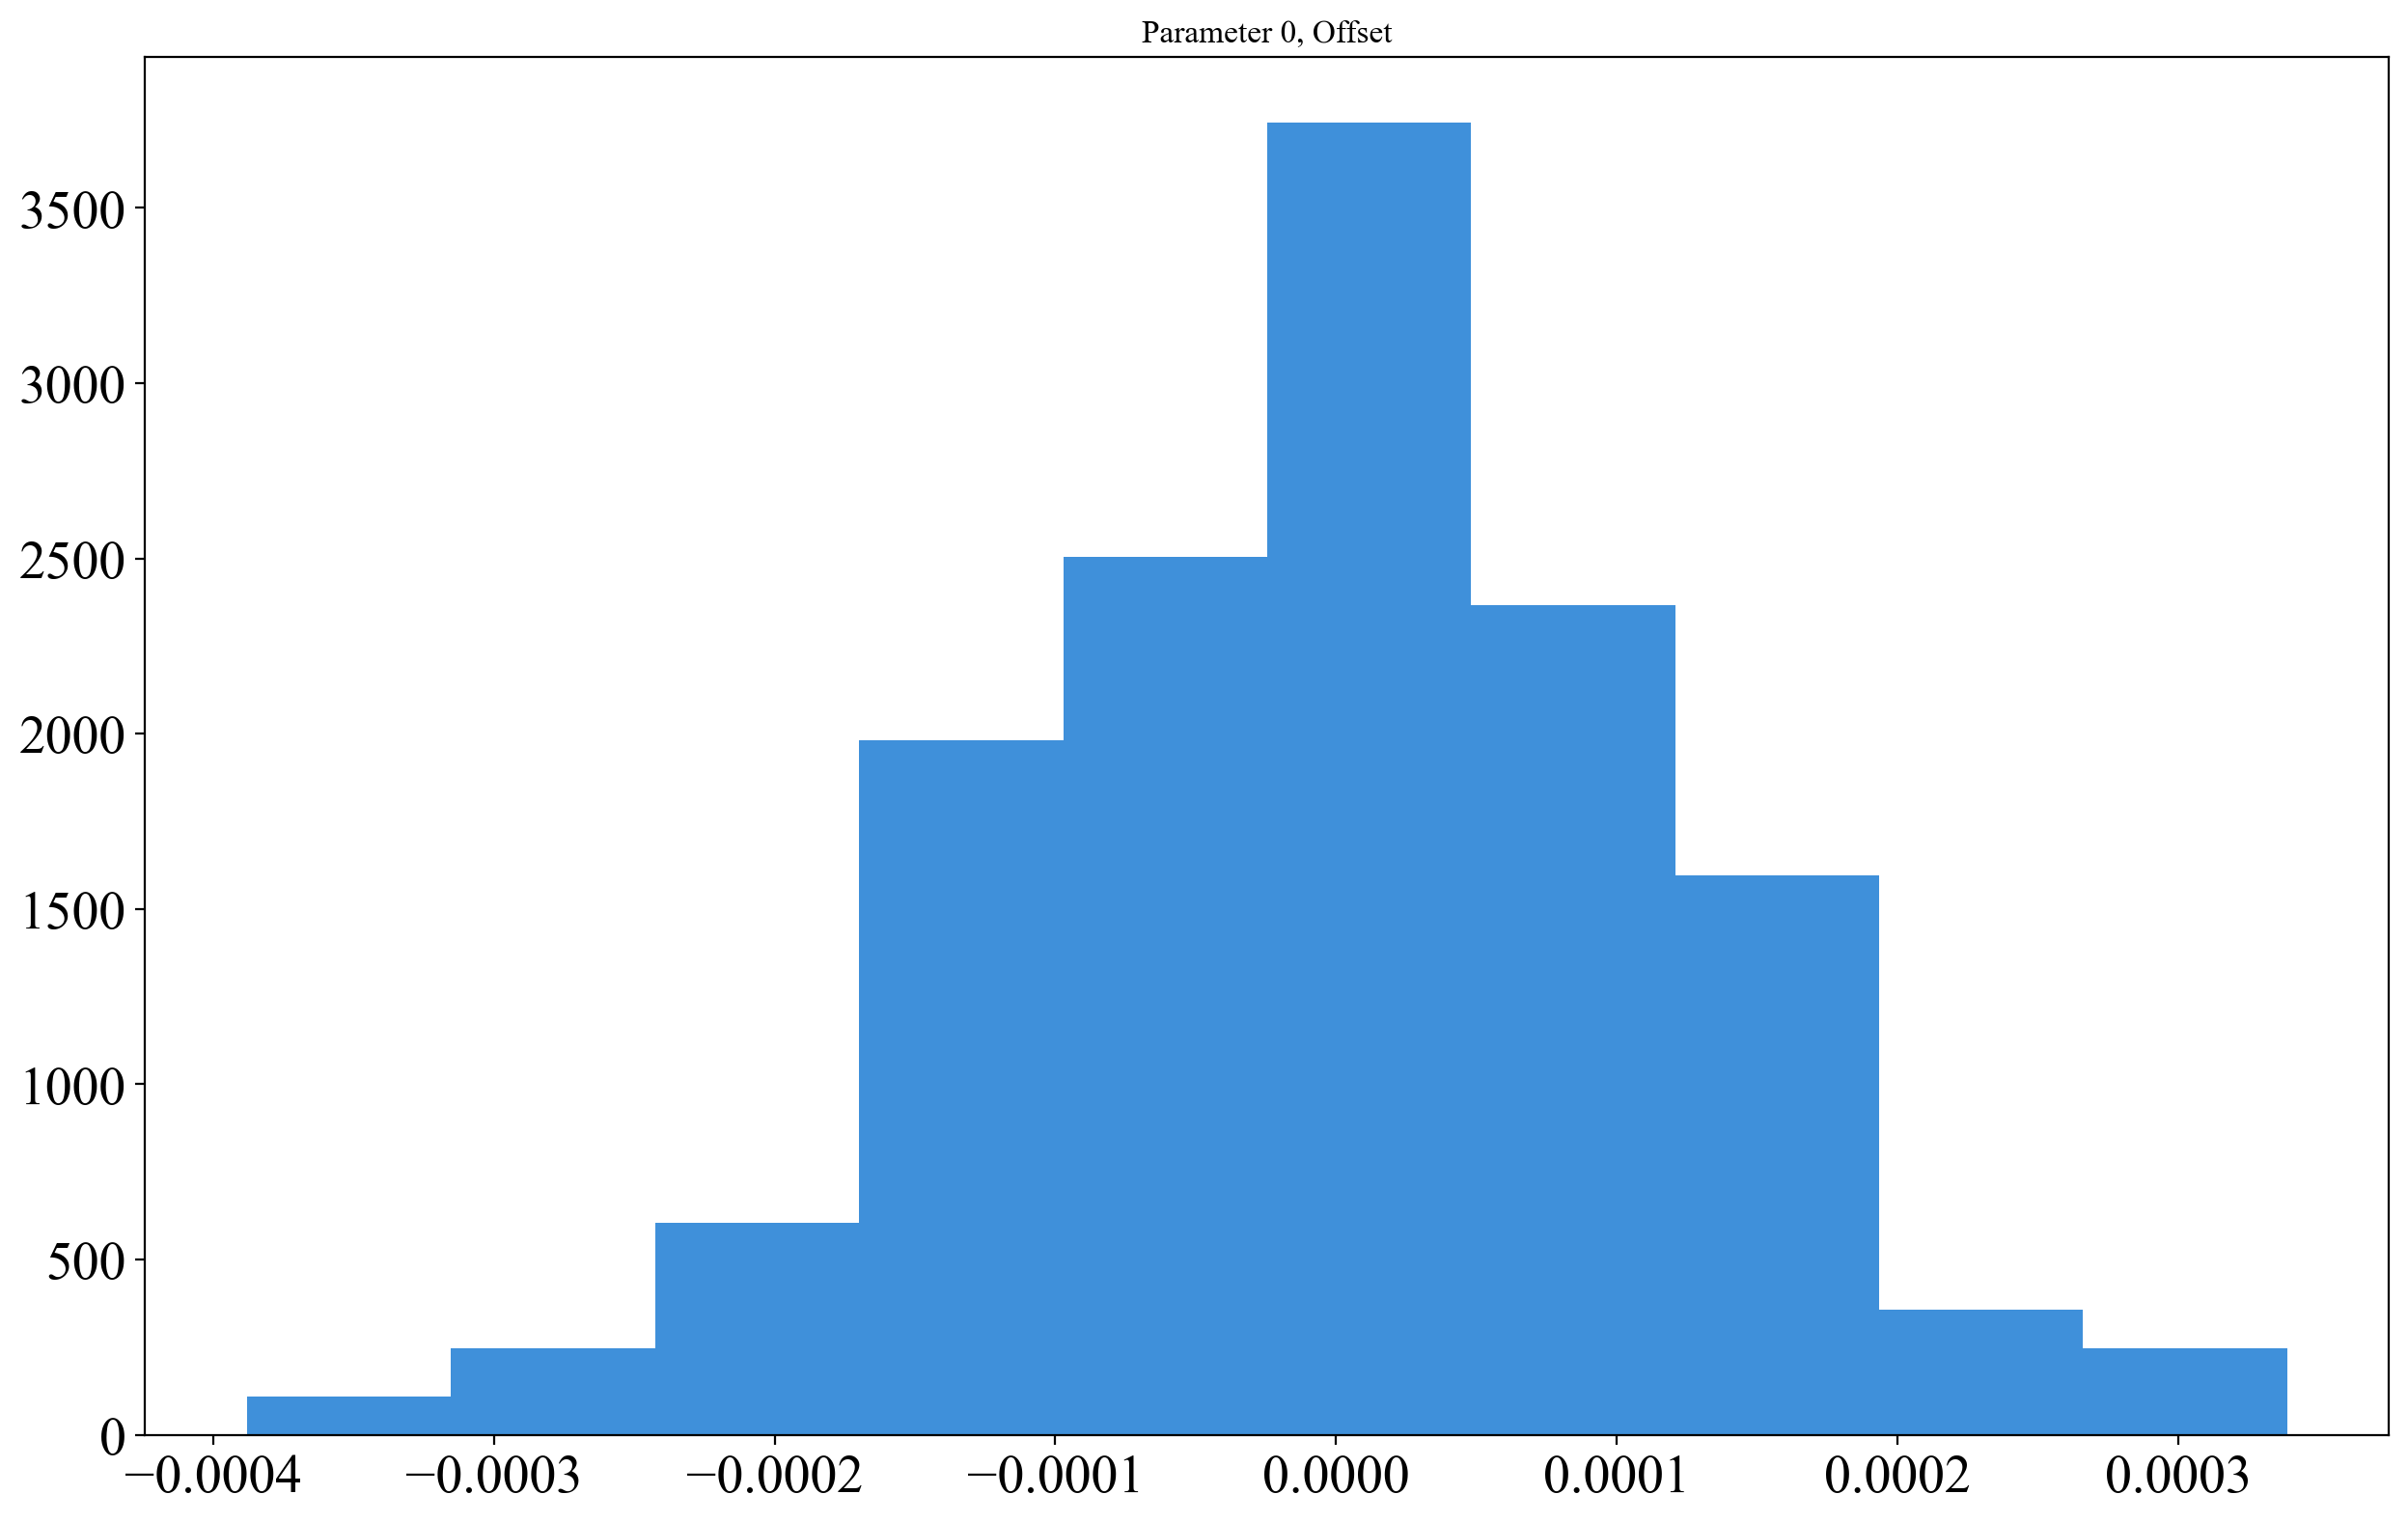

4.264657180978117 4.264687898003569


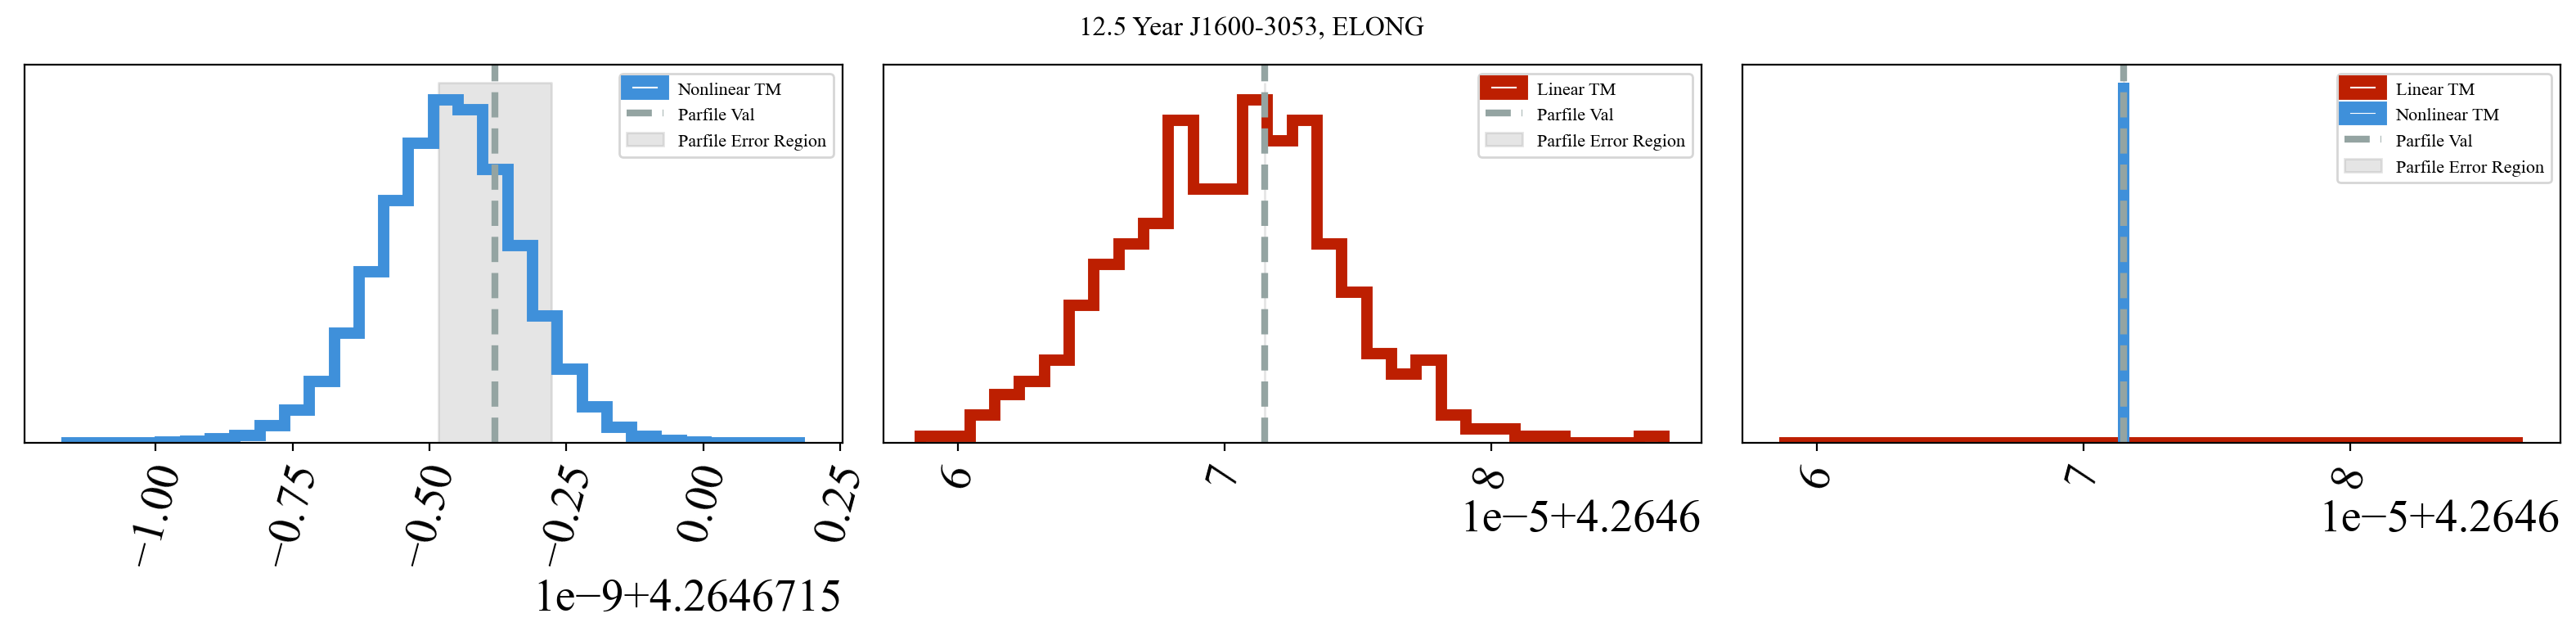

-0.1758051003754964 -0.17577420040885616


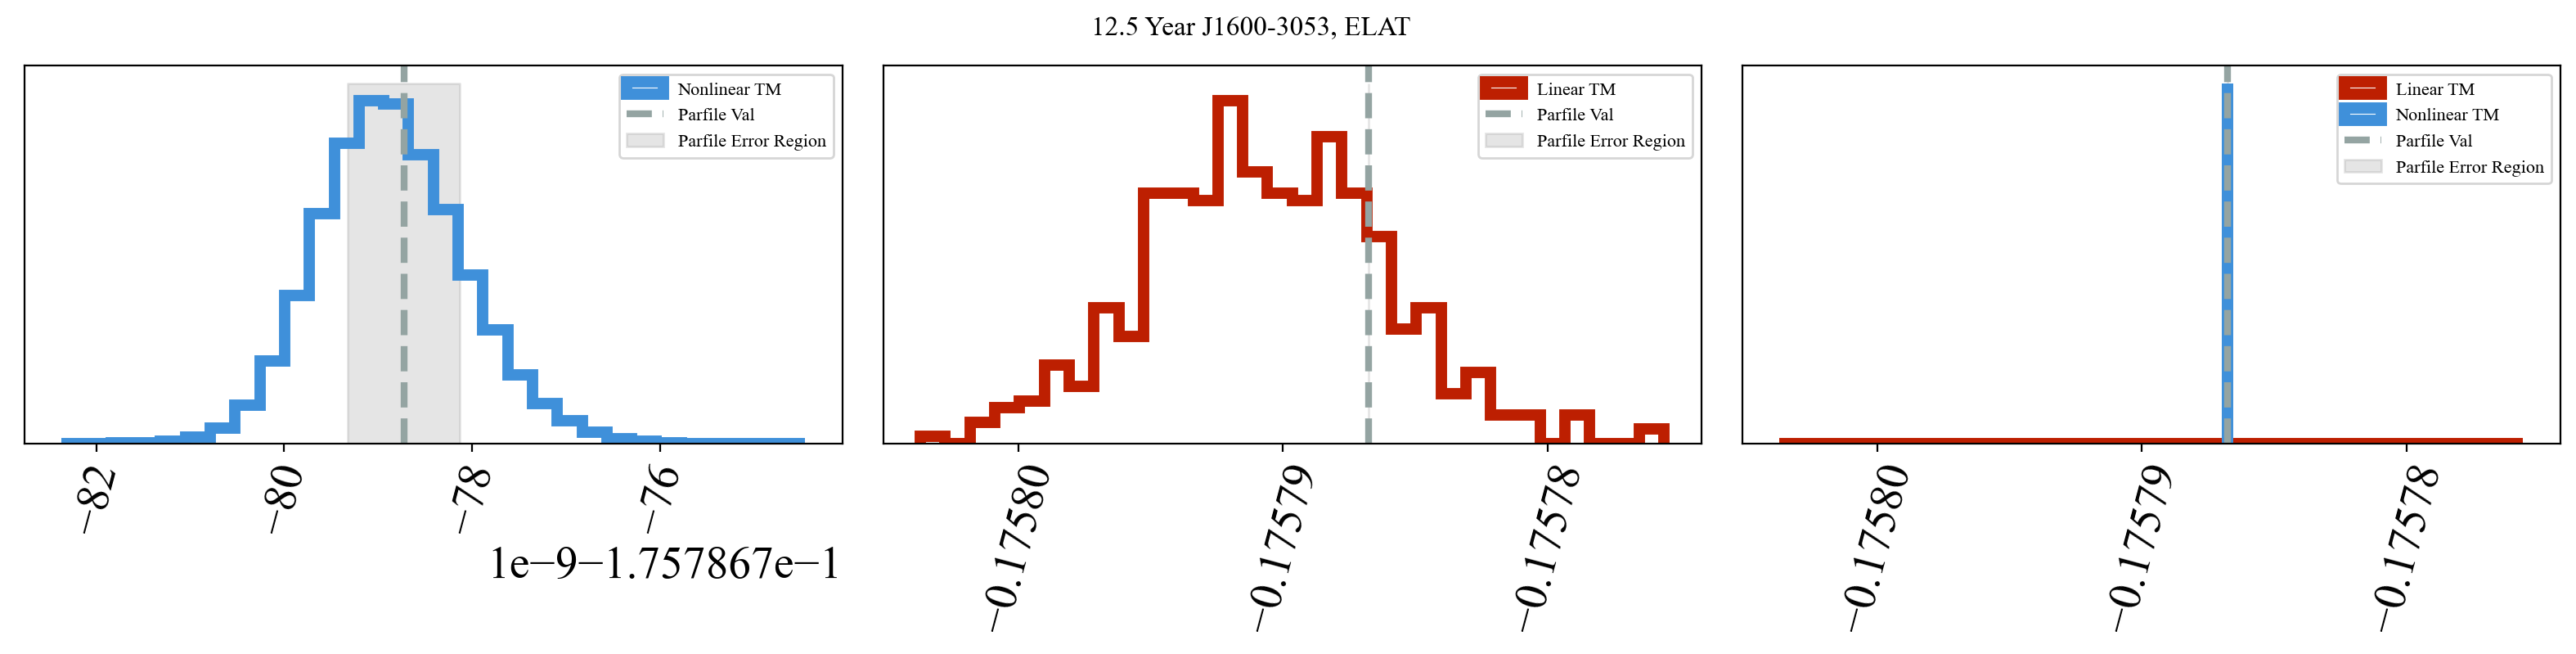

277.9376964616929 277.9377289255067


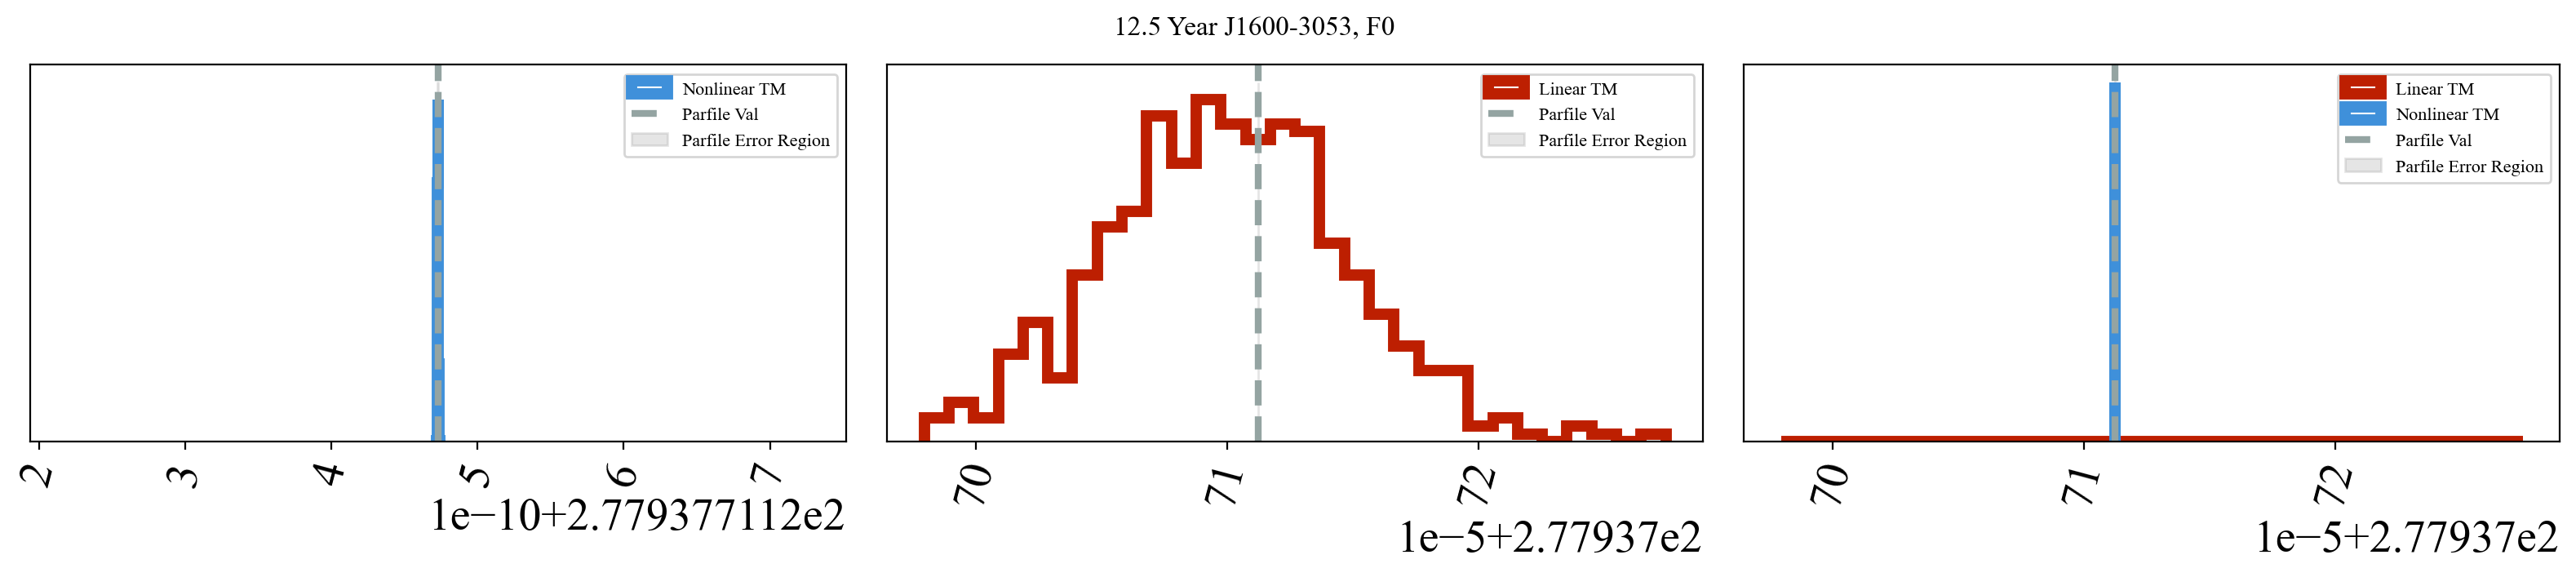

-1.6407350508430017e-05 2.5280290845123632e-05


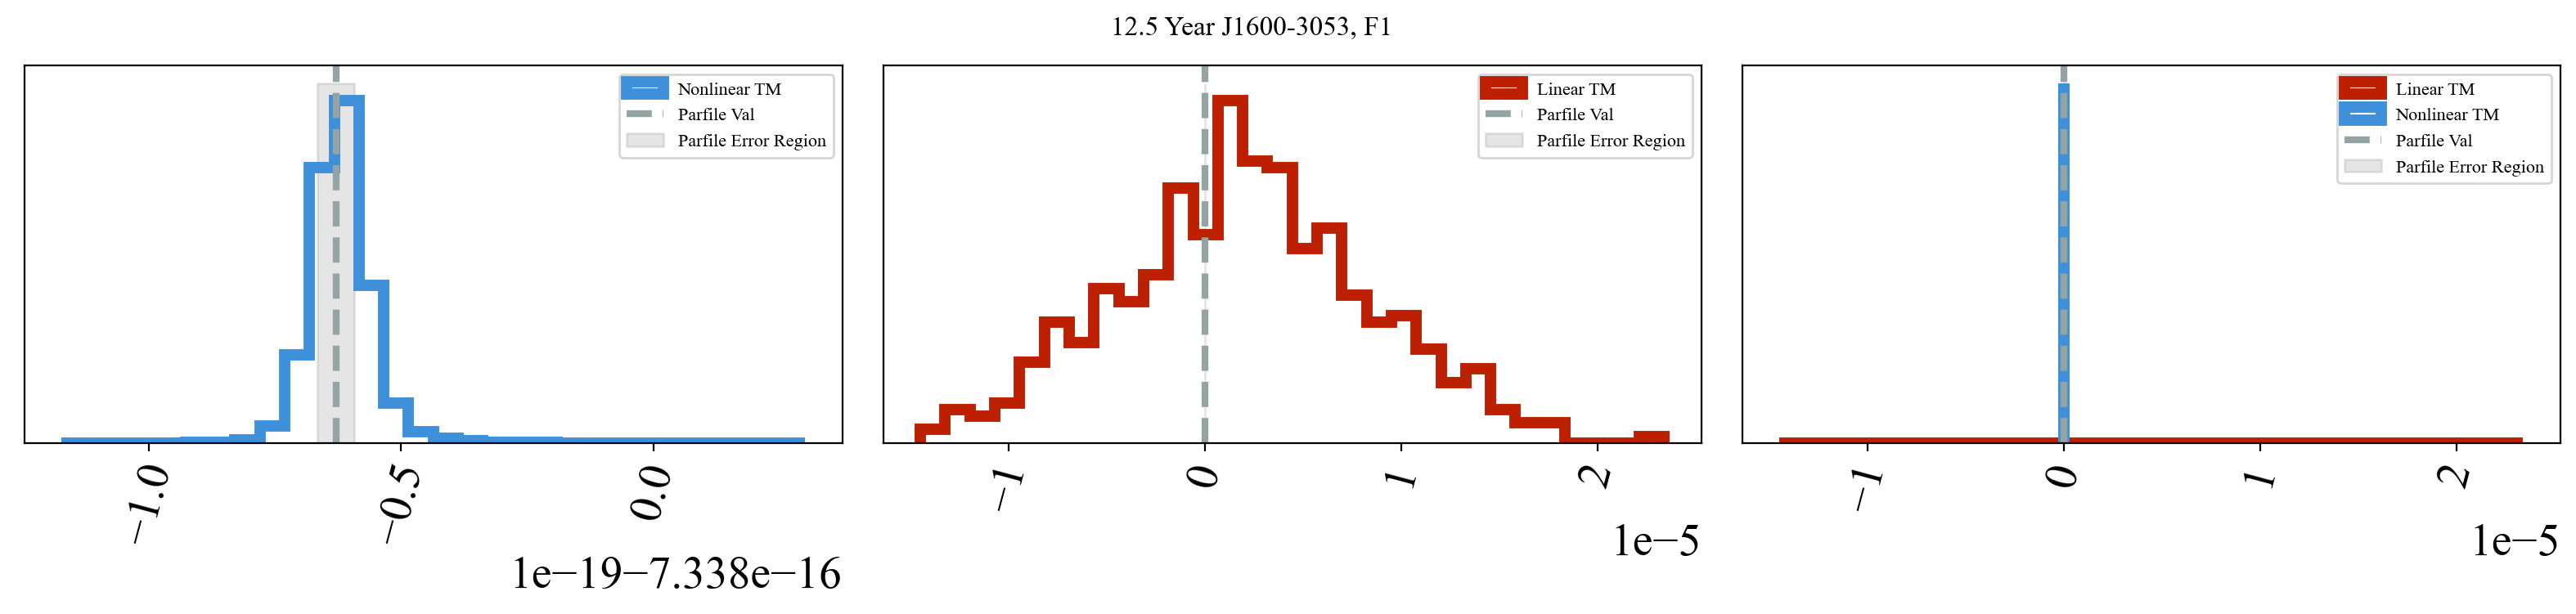

0.40861202127766677 0.532033805436281


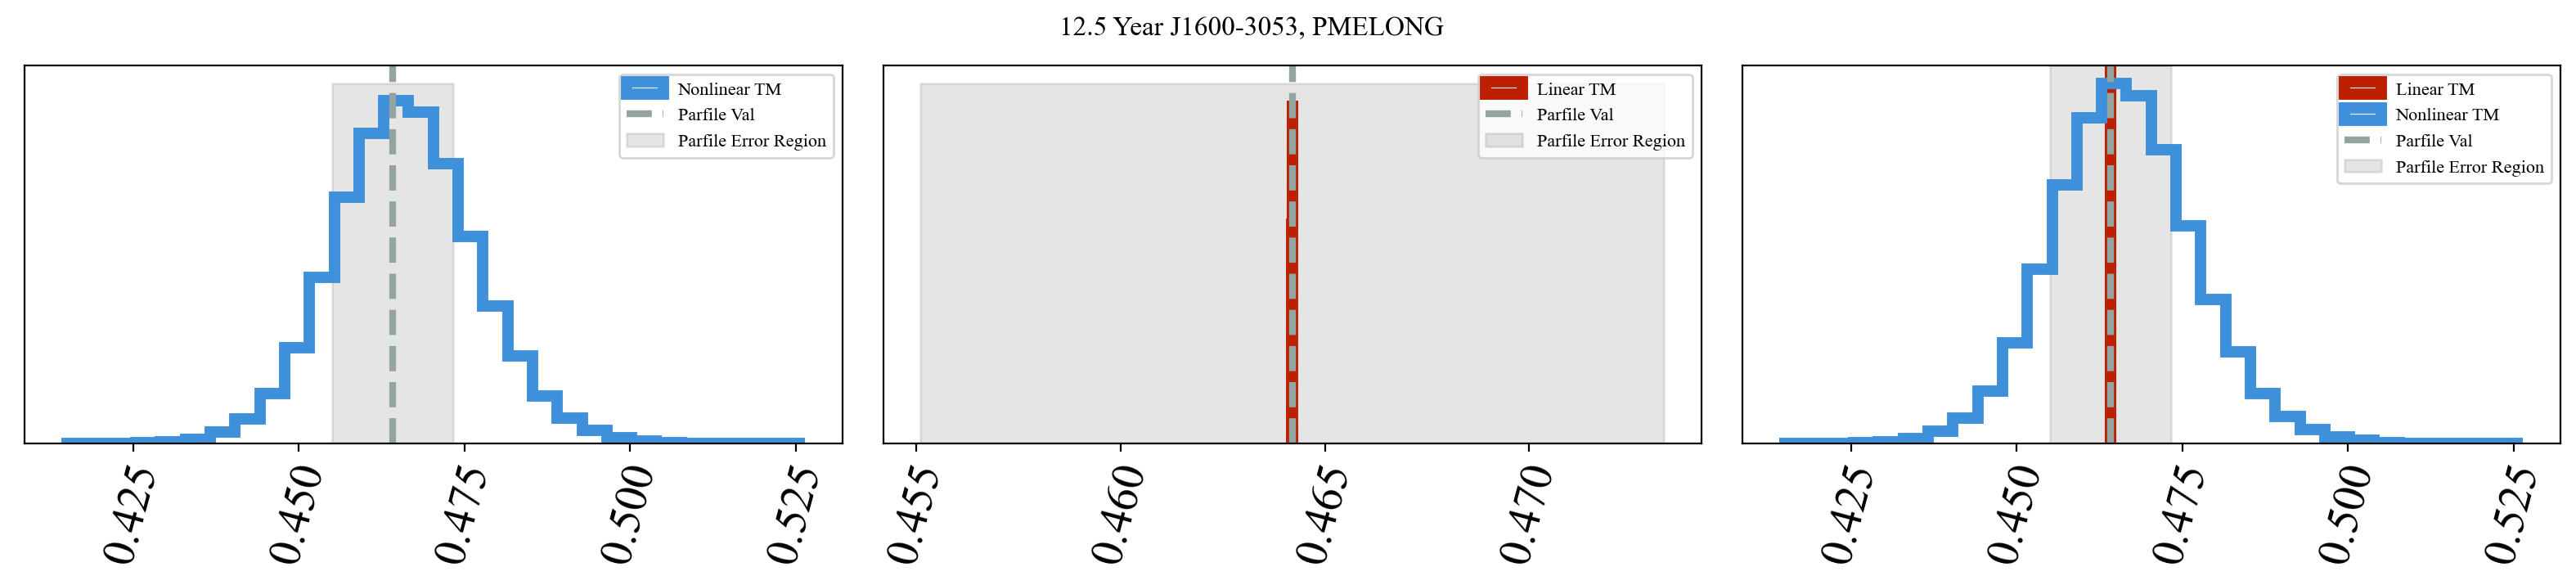

-7.4974937279604985 -6.7306831682084285


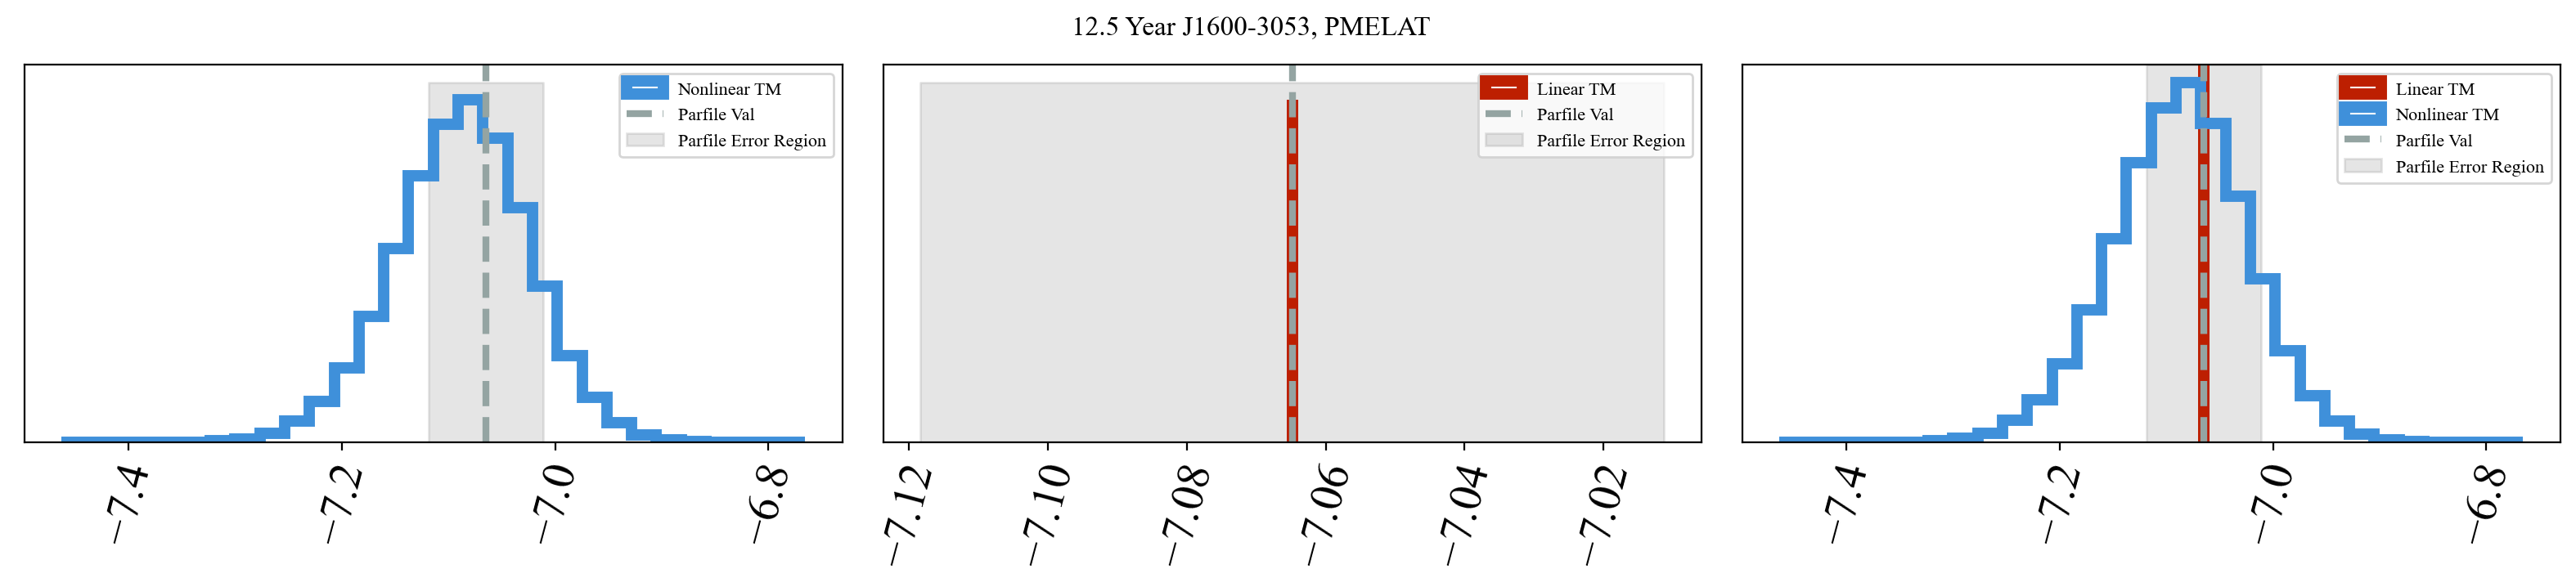

0.03700309237391178 1.1522471620545045


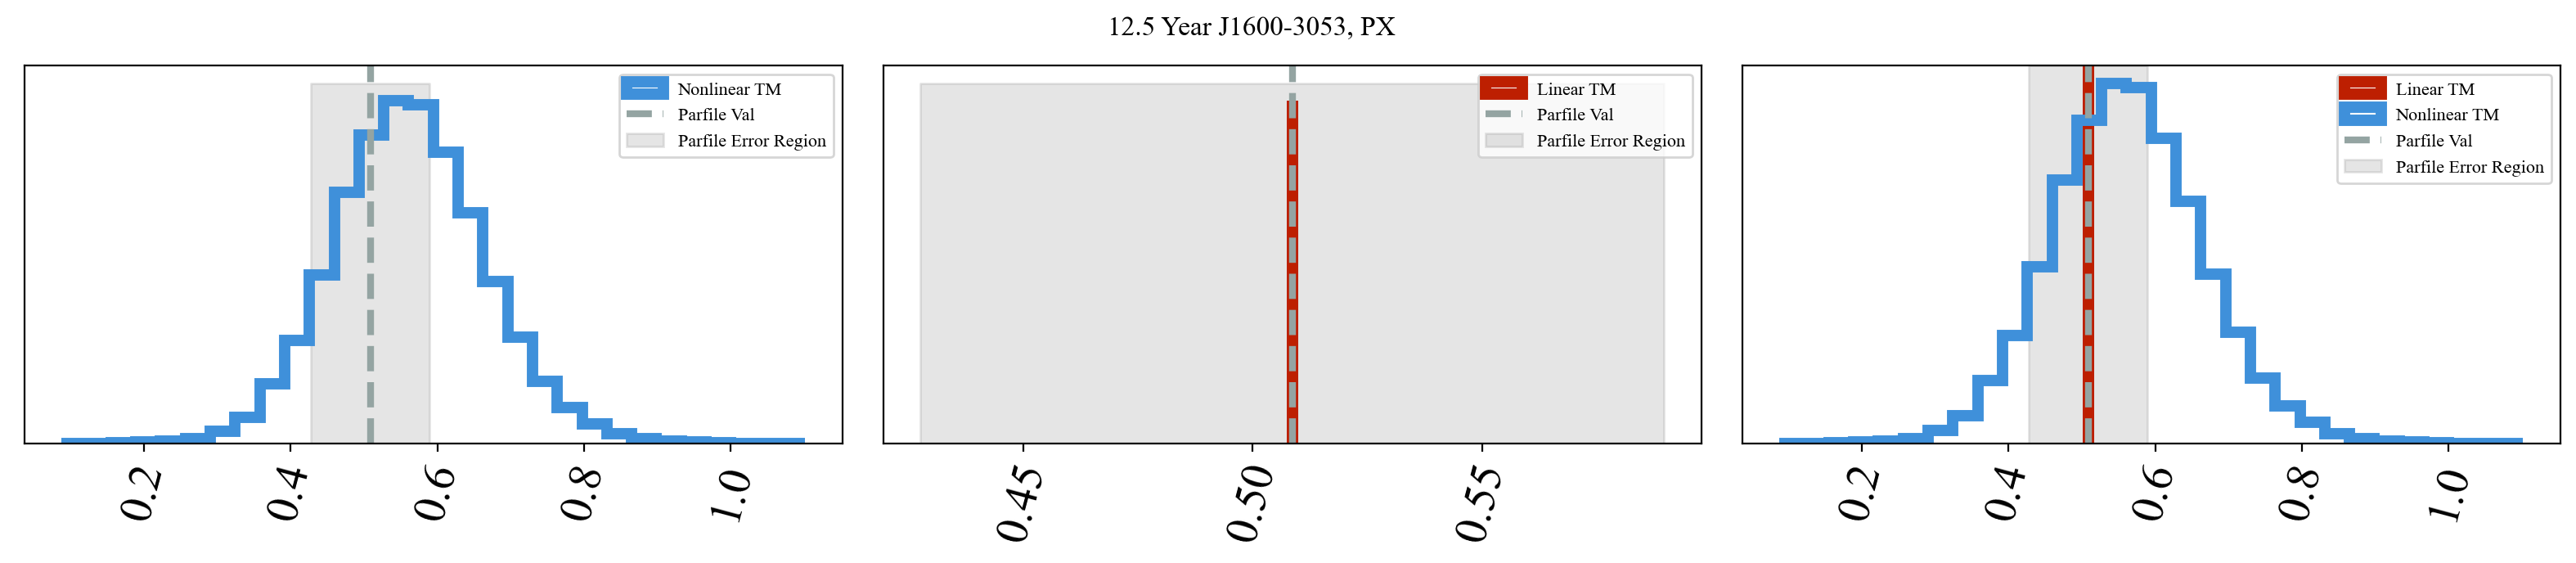

0.23308169993655561 0.6645775477627215


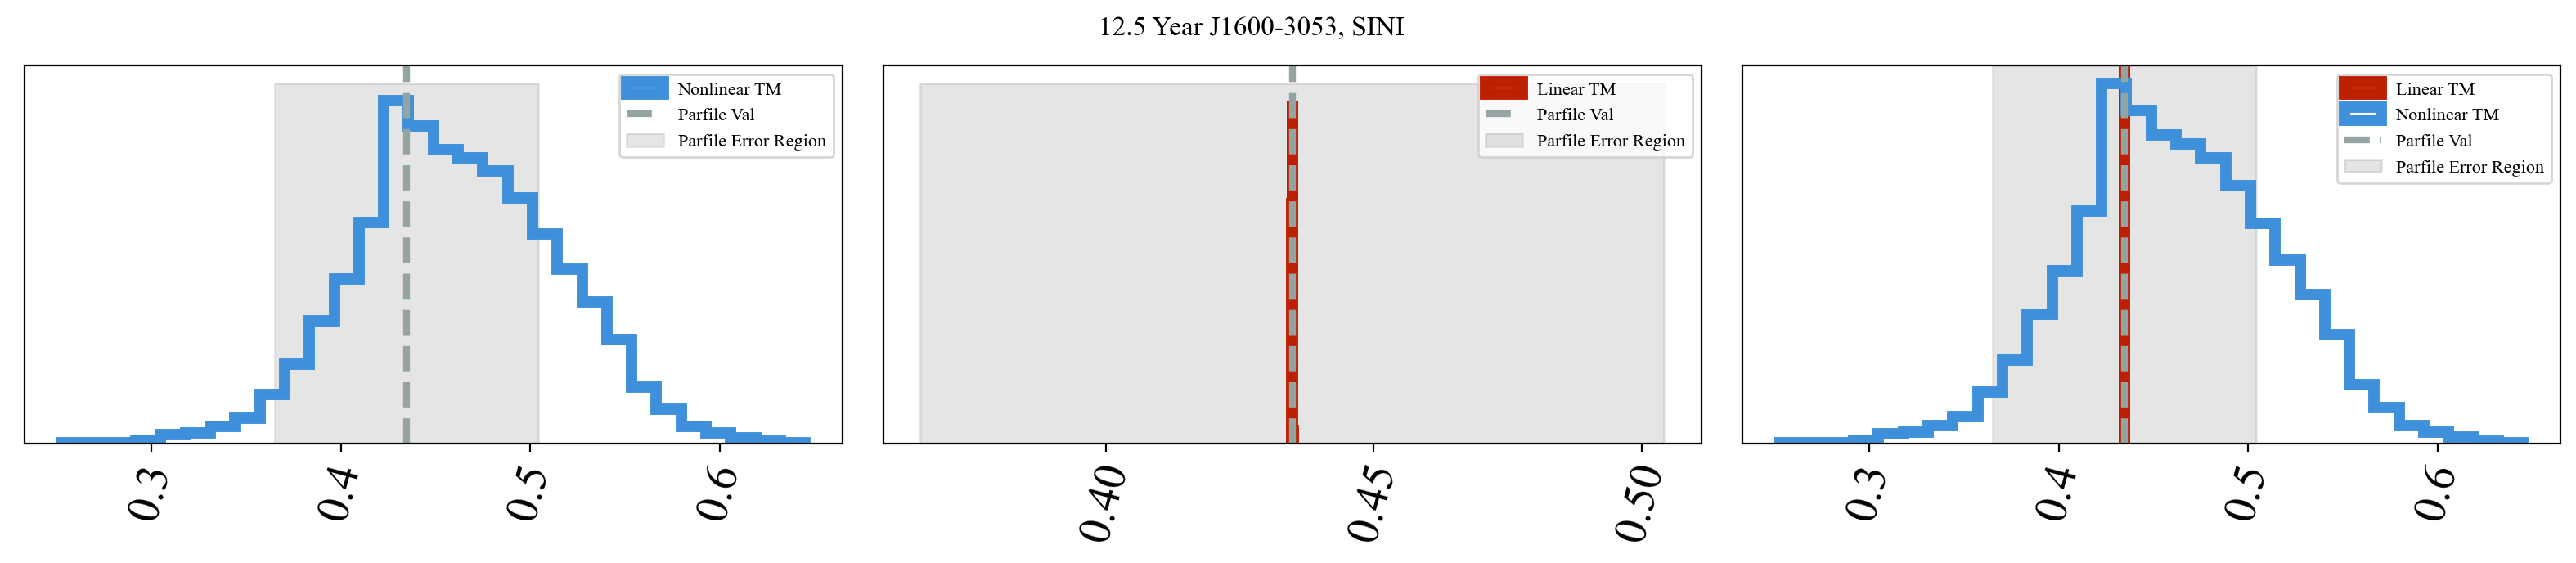

14.34844539800591 14.348469478541775


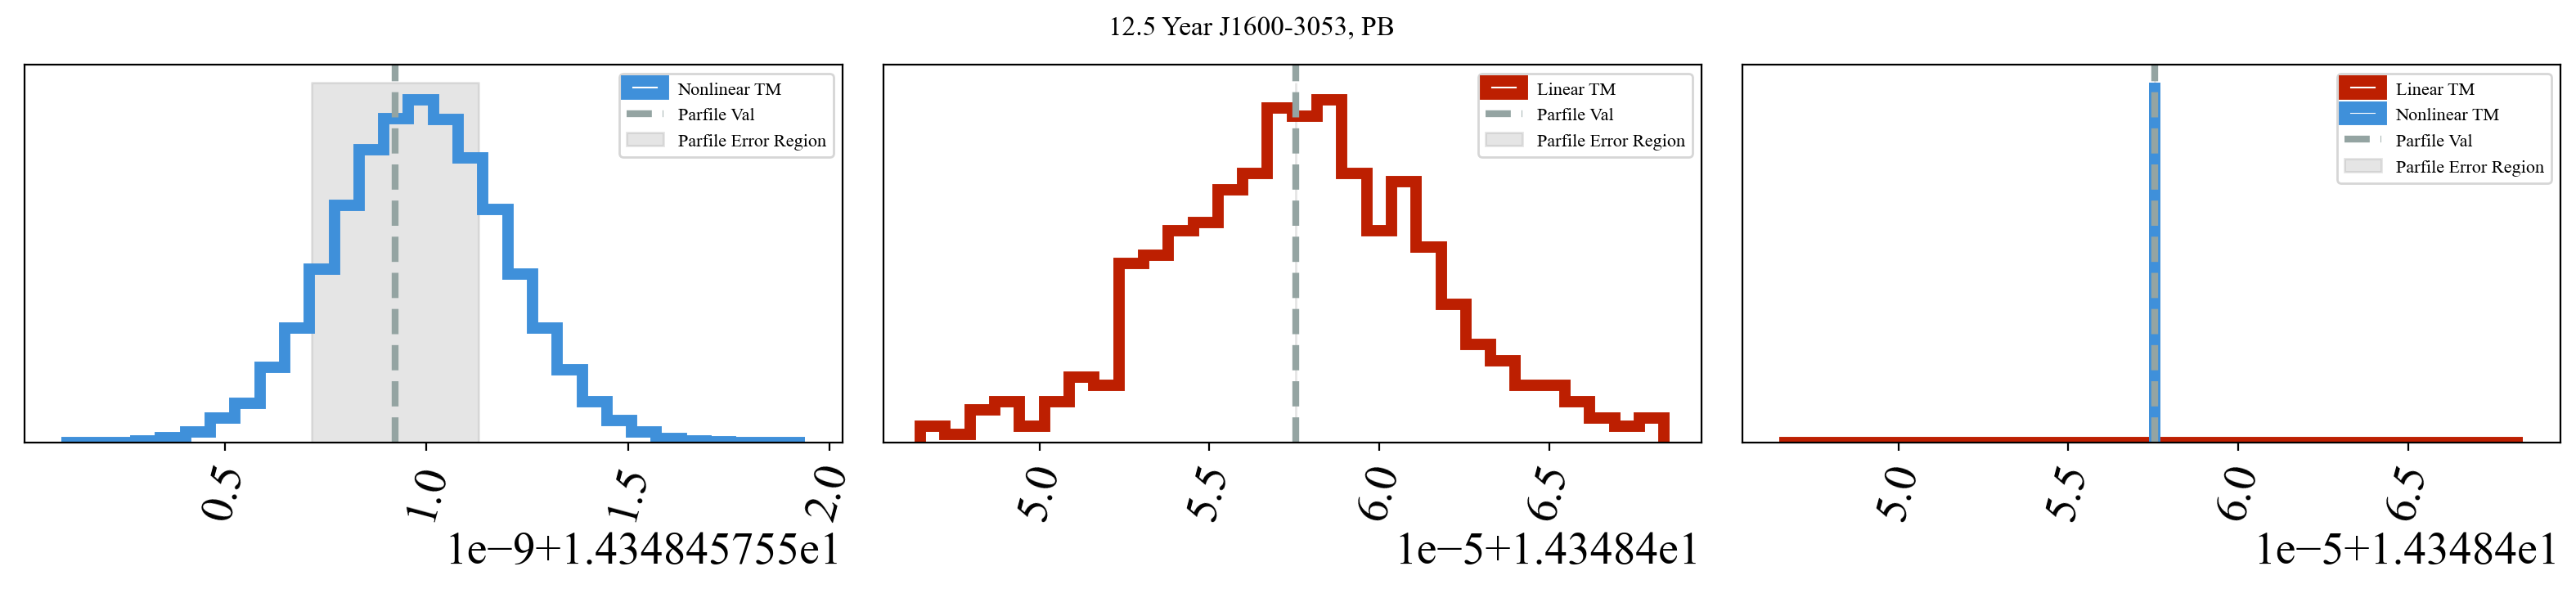

56164.67001191745 56165.67477710803


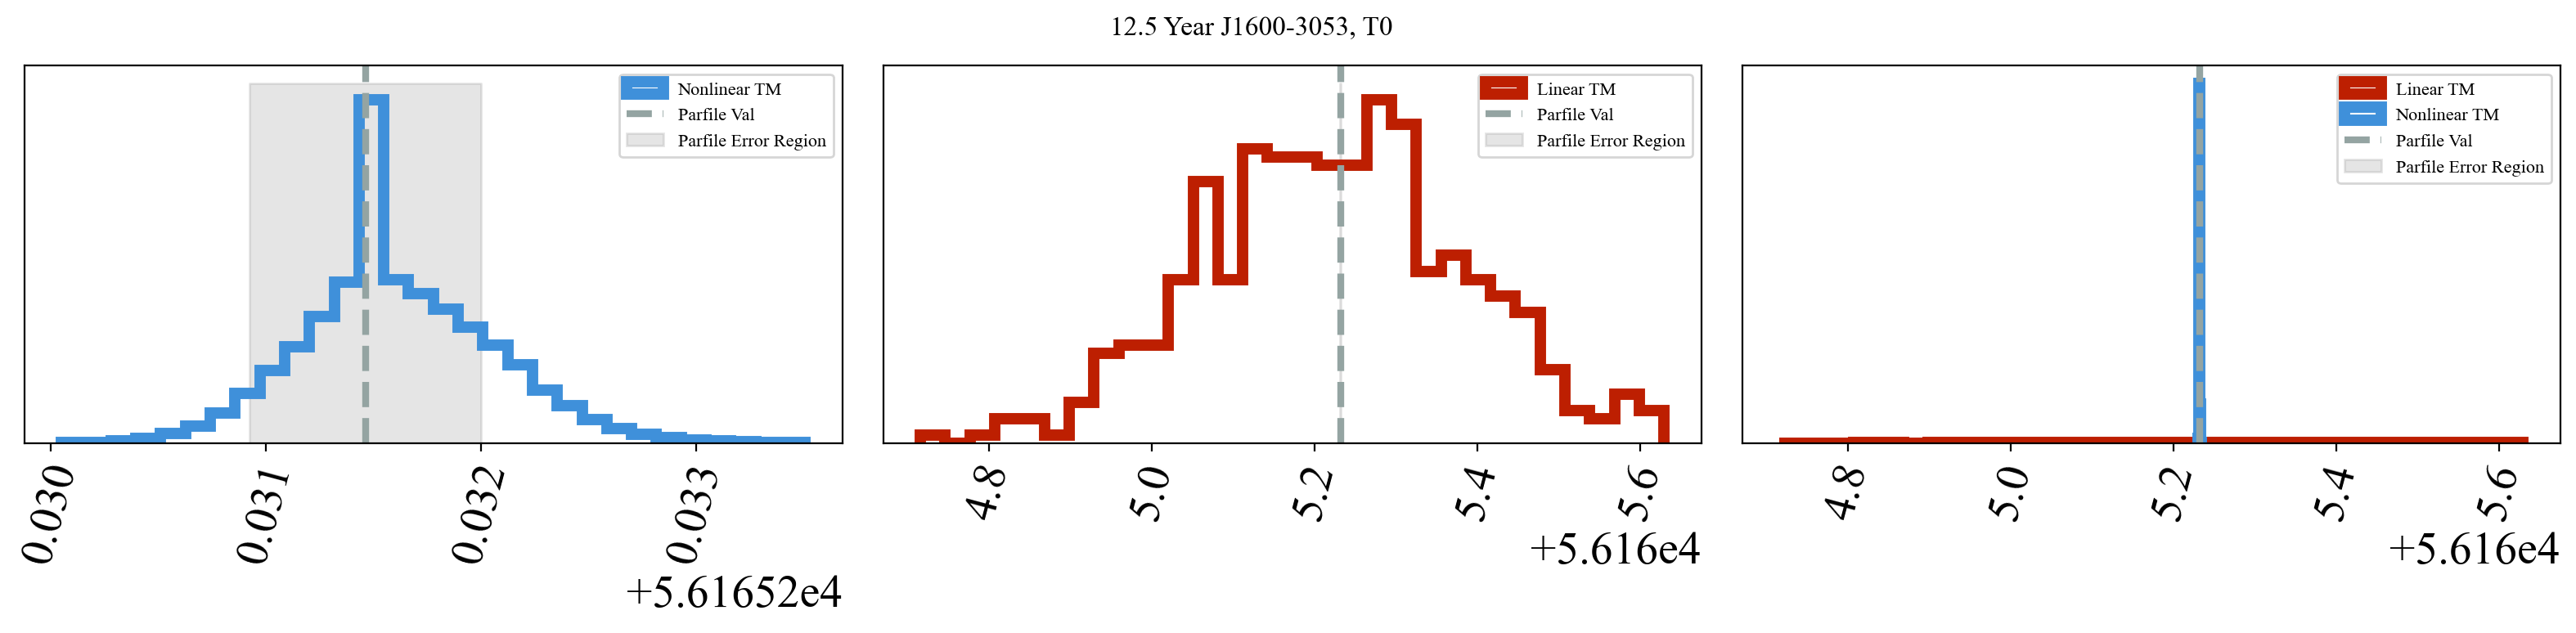

In [ ]:
use_core = core_list_everything[4]
tm_params_orig = use_core.tm_pars_orig
for i,par in enumerate(psr_12p5yr.fitpars):
    plt_coeffs = []
    for coeff in coeffs:
        plt_coeffs.append(coeff[f"{psr_name}_linear_timing_model_coefficients"][i])
    if par == "Offset":
        plt.hist(plt_coeffs,density=True)
        plt.title(f"Parameter {i}, {par}")
    else:
        if par == "SINI":
            nltm_pararr = use_core.get_param(f"{psr_name}_timing_model_COSI",
                                                                    to_burn=False,tm_convert=True)
            truth_val = np.sqrt(1 - tm_params_orig[par][0]**2)
            truth_err = np.sqrt((np.abs(tm_params_orig[par][0] / truth_val)) ** 2 * tm_params_orig[par][1]**2)
            ltm_pararr = plt_coeffs+np.double(truth_val)
        else:
            nltm_pararr = use_core.get_param(f"{psr_name}_timing_model_{par}",
                                                                    to_burn=False,tm_convert=True)
            truth_val = tm_params_orig[par][0]
            truth_err = tm_params_orig[par][1]
            ltm_pararr = plt_coeffs+np.double(truth_val)
        
        fig,ax = plt.subplots(1,3,figsize=(20,3))
        ax[0].hist(nltm_pararr,density=True,histtype='step',color='C0',bins=30,linewidth=5.,label='Nonlinear TM')
        ax[0].axvline(np.double(truth_val),linewidth=3.,linestyle='--',color='C3',label='Parfile Val')
        #ax[0].set_yscale('log')
        
        ax[1].hist(ltm_pararr,density=True,histtype='step',color='C1',bins=30,linewidth=5.,label='Linear TM')
        ax[1].axvline(np.double(truth_val),linewidth=3.,linestyle='--',color='C3',label='Parfile Val')
        #ax[1].set_yscale('log')
        
        ax[2].hist(ltm_pararr,density=True,histtype='step',bins=30,linewidth=5.,color='C1',label='Linear TM')
        ax[2].hist(nltm_pararr,density=True,histtype='step',bins=30,linewidth=5.,color='C0',label='Nonlinear TM')
        ax[2].axvline(np.double(truth_val),linewidth=3.,linestyle='--',color='C3',label='Parfile Val')
        #ax[2].set_yscale('log')
        ax[2].set_ylim(ax[0].get_ylim())
        x_low = np.min([ax[0].get_xlim()[0],ax[1].get_xlim()[0]])
        x_high = np.max([ax[0].get_xlim()[1],ax[1].get_xlim()[1]])
        print(x_low,x_high)
        ax[2].set_xlim([x_low,x_high])
        #ax[2].set_xlim([np.double(truth_val)-np.double(truth_err),
        #               np.double(truth_val)+np.double(truth_err)])
        fill_space_x = np.linspace(np.double(truth_val) - np.double(truth_err),
                                   np.double(truth_val) + np.double(truth_err), 20)

        for axis in ax:
            axis.fill_between(
                fill_space_x, axis.get_ylim()[1], color="grey", alpha=0.2, label='Parfile Error Region'
            )
            axis.get_yaxis().set_visible(False)
            axis.legend(fontsize=8)
            axis.tick_params(axis='x', labelrotation = 75)
        plt.suptitle(f"12.5 Year {psr_name}, {par}")
        plt.subplots_adjust(wspace=.05)
    if i == 10:
        break
        pass
    #plt.savefig(f'{top_dir}/enterprise_timing/Figures/{psr_name}_nltm_vs_ltm_coeffs_{par}.png', dpi=150, bbox_inches='tight')
    plt.show()